# This is a demo

Preparation/Load needed packages

In [85]:
from training_fonts_connection import training_fonts_connection as connection

import os
import re

import PIL
from PIL import Image

import cv2

import numpy as np
import matplotlib.pyplot as plt

import math

import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import layers
# from tensorflow.keras import models

## training

1. get ttf file
2. translate ttf to graph
3. get the edge of each graph
4. draw the edge to a new graph/ prserve the edge as a data
5. construct model (get related information)
6. preserve the model

In [86]:
database_connection = connection()
database_connection.clean()
database_connection.load_data()
png_info = database_connection.get_all(sorted_column="utf_8", ascend_or_descend="ascend")
png_data = []
png_tag = []
png_data_edge = []

for i in range(len(png_info)):
    png_data.append(cv2.cvtColor(cv2.imread(png_info[i][1]), cv2.COLOR_BGR2GRAY))
    png_tag.append(png_info[i][0])



In [87]:
try_data = png_data[5]

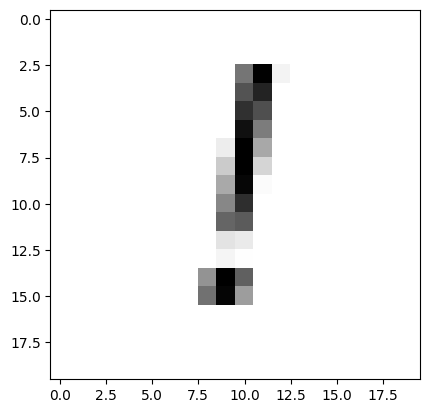

In [88]:
plt.imshow(try_data, cmap="gray", vmin = 0, vmax = 255)

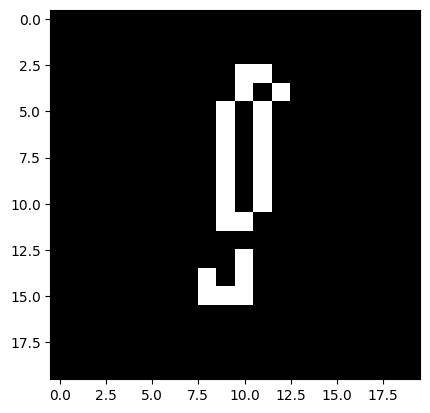

In [104]:
location = 54
try_data_edge = cv2.Canny(try_data, 0, 70)
plt.imshow(try_data_edge, cmap="gray", vmin=0, vmax = 100)
# plt.axvline(x=location, color='red')
# plt.axhline(y=location, color="blue")

In [105]:
def reshape(data):
    data_shape = data.shape
    if data_shape != (100,100):
        if data_shape(0) > 100:
            for i in range(data_shape(0)):
                pass
                
    return data_shape

In [106]:
# reshape(try_data_edge)

In [107]:
database_connection.close(True)

ProgrammingError: Cannot operate on a closed database.

## usage

1. get photo
2. use GaussBlur
3. cut into pieces
4. add frame
5. draw the edge
6. prediction by using the model
7. give expectation
8. combine characters together
9. test whether the character is placed in correct place
10. test whether the character is a suitable output

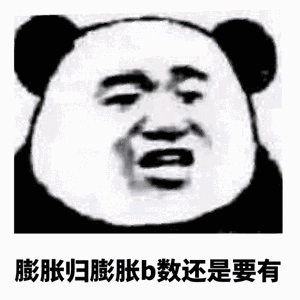

In [ ]:
usage_image_original = Image.open("test.gif")
usage_image_original = usage_image_original.convert("RGB")
usage_image_original.save("test.gif.png", "PNG")
usage_image_original

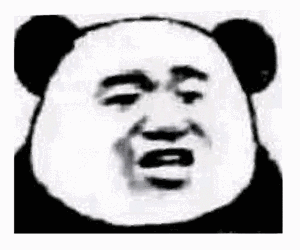

In [ ]:
usage_image_original_width, usage_image_original_height = usage_image_original.size
usage_image_cropped = usage_image_original.crop((0,0,300,250))
usage_image_cropped.save("test.gif.png", "PNG")
usage_image_cropped

In [ ]:
usage_image_cropped_cv = np.array(usage_image_cropped)

In [ ]:
usage_image_cropped_cv_gray = cv2.cvtColor(usage_image_cropped_cv, cv2.COLOR_BGR2GRAY)

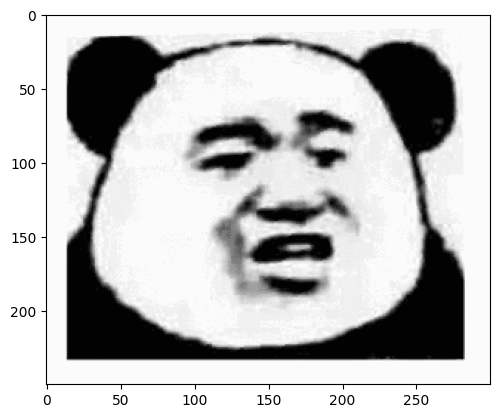

In [ ]:
plt.imshow(usage_image_cropped_cv_gray, cmap="gray", vmin=0, vmax=255)

In [ ]:
usage_image_cropped_cv_blurred = cv2.GaussianBlur(usage_image_cropped_cv_gray, (3,3), 0)
usage_image_cropped_cv_blurred_np = np.asarray(usage_image_cropped_cv_blurred)

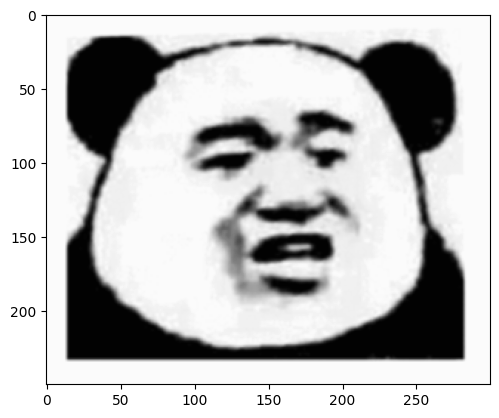

In [ ]:
plt.imshow(usage_image_cropped_cv_blurred, cmap="gray", vmin=0, vmax=255)

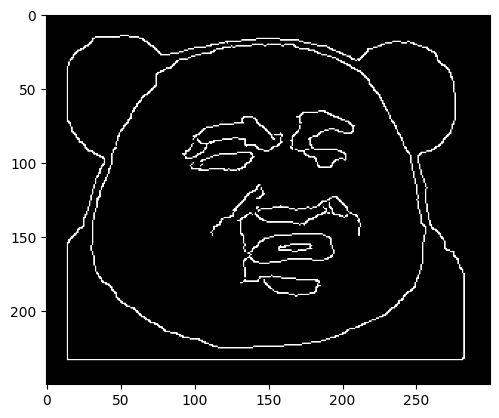

In [ ]:
usage_image_cropped_cv_edge = cv2.Canny(usage_image_cropped_cv_blurred,5,300)
plt.imshow(usage_image_cropped_cv_edge, cmap='gray', vmin=50, vmax=200)

In [ ]:
usage_image_cropped_cv_blurred_np[100]

array([251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
       251, 251, 251, 251, 251, 251, 251, 250, 249, 249, 250, 250, 249,
       246, 244, 244, 245, 244, 242, 238, 231, 222, 214, 209, 196, 169,
       126,  74,  38,  41,  78, 134, 192, 228, 236, 235, 237, 239, 240,
       240, 244, 249, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
       251, 251, 251, 251, 251, 251, 251, 251, 251, 250, 249, 249, 250,
       250, 250, 249, 249, 249, 249, 250, 248, 243, 239, 243, 249, 249,
       243, 236, 231, 227, 225, 223, 213, 199, 186, 176, 165, 154, 138,
       113,  80,  49,  29,  16,   7,   3,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   3,  14,  43,  80, 112, 139, 163, 185, 206, 221, 227,
       230, 233, 232, 226, 225, 231, 236, 236, 233, 232, 235, 237, 238,
       239, 239, 239, 240, 240, 239, 237, 235, 236, 237, 238, 239, 238,
       236, 233, 230, 225, 221, 219, 218, 215, 212, 213, 214, 20

In [ ]:
usage_image_cropped_cv_blurred_splited = []
usage_image_splited_size = 30
part_row_num = math.ceil(len(usage_image_cropped_cv_blurred_np)/usage_image_splited_size)
part_col_num = math.ceil(len(usage_image_cropped_cv_blurred_np[0])/usage_image_splited_size)
for i in range(len(usage_image_cropped_cv_blurred_np), part_row_num*usage_image_splited_size):
    tmp_array = np.full((1, usage_image_cropped_cv_blurred_np.shape[1]), 251)
    usage_image_cropped_cv_blurred_np = np.vstack((usage_image_cropped_cv_blurred_np, tmp_array))
for i in range(len(usage_image_cropped_cv_blurred_np[0]), part_col_num*usage_image_splited_size):
    tmp_array = np.full((usage_image_cropped_cv_blurred_np.shape[0],1), 251)
    usage_image_cropped_cv_blurred_np = np.hstack((usage_image_cropped_cv_blurred_np, tmp_array))

In [ ]:
usage_image_cropped_cv_blurred_np.shape

(270, 300)

----

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import scipy.interpolate as spi
import matplotlib.pyplot as plt

In [2]:
TEST_IMAGES_DIR_PATH = os.path.join(os.path.dirname(os.path.abspath(__name__)), "test_images")

In [3]:
test_image_collection = []
for root, dirs, files in os.walk(TEST_IMAGES_DIR_PATH):
    for file in files:
        full_path = os.path.abspath(os.path.join(root,file))
        # print(full_path)
        tmp_image = Image.open(full_path).convert("L")
        tmp_image = np.array(tmp_image)
        # tmp_image = tmp_image.astype(np.int8)
        test_image_collection.append(tmp_image)



In [4]:
print(test_image_collection)
print(test_image_collection[0])

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[253, 253, 253, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255],
       ...,
       [255, 254, 254, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [5]:
test_num = 20

In [6]:
print(test_image_collection[test_num].shape)

(512, 512)


In [7]:
import math
def crop_array(np_array, aim_width = 20):
    y_crop_time = math.floor(np_array.shape[0] / aim_width)
    x_crop_time = math.floow(np_array.shape[1] / aim_width)
    tmp_collection = np.empty((x_crop_time, y_crop_time))
    for i in range(x_crop_time):
        for j in range(y_crop_time):
            tmp_collection[i][j] = np_array[i*aim_width:(i+1)*aim_width, j*aim_width:(j+1)*aim_width].copy

    return tmp_collection
    pass

In [8]:
# import predeiction

# tmp_predictor = predeiction.prediction()


2023-07-12 11:21:26.575164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 11:21:26.624345: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-12 11:21:26.625326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 11:21:27.440836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
cropped_array = crop_array(test_image_collection[0])